# Lista 5

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Zadanie 2


In [26]:
def cov(h, theta, sigma_Z, sigma_W):
    if h == 0:
        return (1 + theta**2)*sigma_Z**2 + sigma_W**2
    if h == 1 or h == -1:
        return theta*sigma_Z**2
    else:
        return 0
    
def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

In [27]:
n = 1000
sigma_W = 1
sigma_Z = 4
theta = 0.5
h = np.arange(0,11,1)

W = np.random.normal(0, sigma_W, size=n)
Z = np.random.normal(0, sigma_Z, size=n+1)
X_t = np.zeros(n)

for i in range(1,n+1):
    X_t[i-1] = Z[i] + theta*Z[i-1]

Y_t = X_t + W

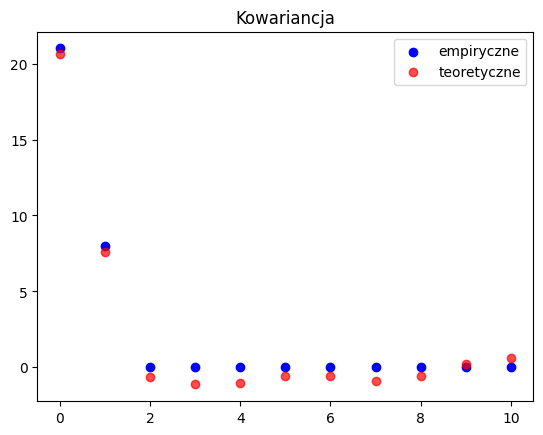

In [32]:
for i, h_ in enumerate(h):
    plt.scatter(i, cov(h_,theta,sigma_Z,sigma_W), c='b')
    plt.scatter(i, autocov(Y_t,h_,n), c='r', alpha=0.7)
plt.title('Kowariancja')
plt.legend(['empiryczne', 'teoretyczne'])
plt.show()

## Zadanie 4
Wysymuluj próbę z modelu:
$$ X_t = m(t) + s(t) + Y_t $$
gdzie $m(t)$ to wielomian rzędu 1 o zadanych współczynnikach, a $s(t)$ -dowolna funkcja okresowa. Ponadto $\{Yt\}$ to szereg MA(1) (zdefiniowany na wykładzie). Policz funkcję autokowariancji szeregu $\{Xt\}$. Następnie usuń składowe deterministyczne. Empiryczną funkcję autokowariancji uzyskanego szeregu (po usunięciu składowych deterministycznych) porównaj z funkcją autokowariancji szeregu MA(1).

In [83]:
a1 = 1.5
a2 = 5
b1 = 2
b2 = 3
theta = 0.5
sigma = 1
h = np.arange(0,11,1)
t = np.arange(0,10.01,0.01)
X_t = np.zeros(n+1)
Zi = np.random.normal(0, sigma, size=n+2)

# model MA(1)
for i in range(1,n+2):
    X_t[i-1] = Zi[i] + theta*Zi[i-1]

m_t = a1*t + a2
s_t = b1*np.sin(b2*t)

Y_t = m_t + s_t + X_t
print(Y_t)

[ 4.5445131   5.23542943  6.27078645 ... 20.12592128 18.40500073
 17.55812454]


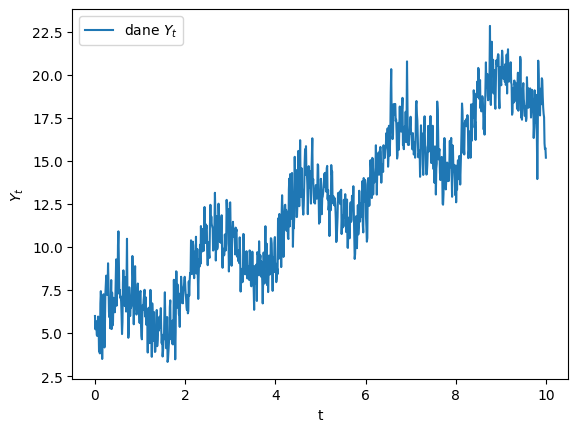

In [69]:
plt.plot(t, Y_t, label=r'dane $Y_t$')
plt.xlabel('t')
plt.ylabel(r'$Y_t$')
plt.legend()
plt.show()

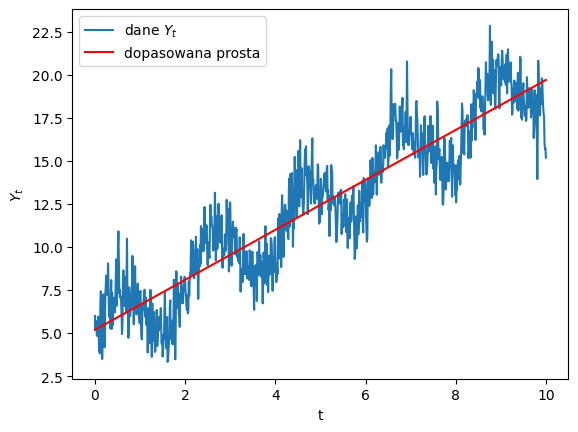

In [70]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta0, beta1

beta0, beta1 = poly_fit(t, Y_t)

def linear(t, beta0, beta1):
    return beta1*t + beta0

plt.plot(t, Y_t, label=r'dane $Y_t$')
plt.plot(t, linear(t, beta0, beta1), c='r', label='dopasowana prosta')
plt.xlabel('t')
plt.ylabel(r'$Y_t$')
plt.legend()
plt.show()

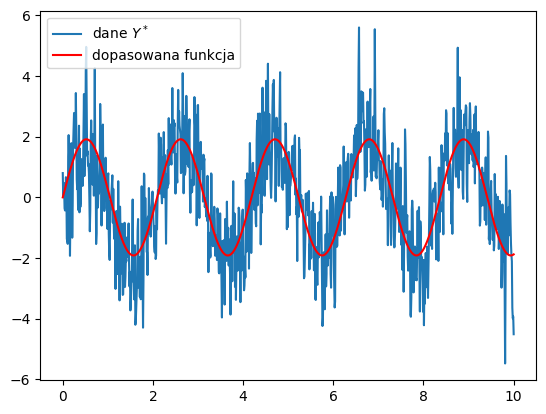

In [80]:
Y_star = Y_t - (beta1*t + beta0)

def poly_fit_sin(x, param1, param2):
    return param1*np.sin(param2*x)

params = optimize.curve_fit(poly_fit_sin, t, Y_star, p0=[max(Y_star), 2*np.pi/2.2])

plt.plot(t, Y_star, label=r'dane $Y^*$')
plt.plot(t, poly_fit_sin(t, params[0][0], params[0][1]), c='r', label='dopasowana funkcja')
plt.legend()
plt.show()

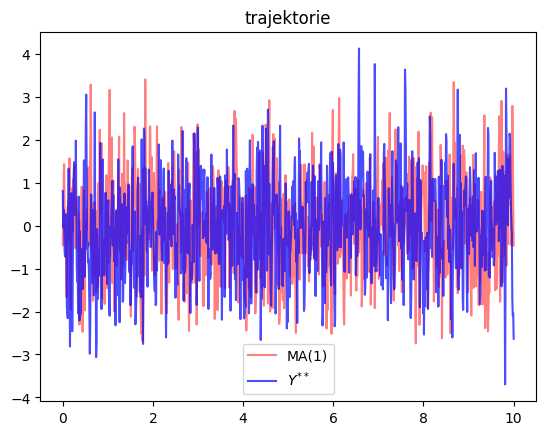

In [108]:
Y_2stars = Y_star - poly_fit_sin(t, params[0][0], params[0][1])

plt.plot(t, X_t, c='r', alpha=0.5, label='MA(1)')
plt.plot(t, Y_2stars, c='b', alpha=0.7, label=r'$Y^{**}$')
plt.legend()
plt.title('trajektorie')
plt.show()

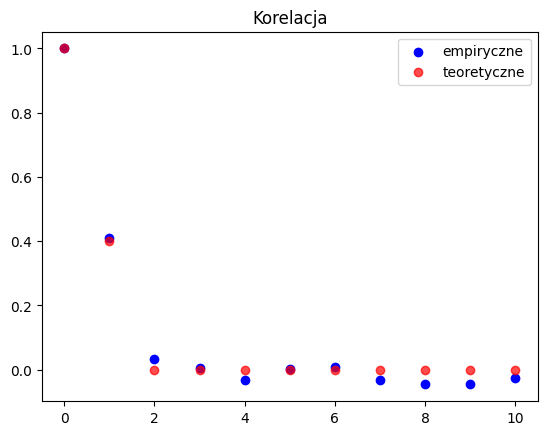

In [109]:
def corr_teo(h,a):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return a / (1 + a**2)
    else:
        return 0

def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

def autocorr(x,h,n):
    return autocov(x,h,n)/autocov(x,0,n)

for i, h_ in enumerate(h):
    plt.scatter(i, autocorr(Y_2stars, h_, n), c='b')
    plt.scatter(i, corr_teo(h_, theta), c='r', alpha=0.7)
plt.title('Korelacja')
plt.legend(['empiryczne', 'teoretyczne'])
plt.show()